# PRÁCTICA 2.2 - VÍCTOR CHOZA MERINO - ADRIÁN TURIEL CHARRO

Ver como usar plot_decisionboundary

## 2. Regresión logística regularizada

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.parsers import read_csv
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def sigmoide(z): #g(z)
    return (1 / (1 + np.exp(-z)))

In [3]:
def gradiente(Thetas, X, Y, lambdaa):
    H = sigmoide(np.matmul(X, Thetas))   #Hipótesis
    return np.matmul(X.T, H - Y)*(1/len(X)) + (lambdaa/len(X))*Thetas

In [11]:
def coste(theta, X, Y, reg):
    h = sigmoide(X.dot(theta))
    m = len(X)

    J = (-1 / m) * (np.log(h).T.dot(Y) + np.log(1 - h + 1e-6).T.dot(1 - Y)) \
        + (reg / (2 * m)) * np.sum(np.square(theta[1:]))

    return J

In [12]:
def plot_decisionboundary(X, Y, theta, poly):
    plt.figure()

    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),np.linspace(x2_min, x2_max))
    
    h = sigmoide(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(theta))
    h = h.reshape(xx1.shape)

    # Obtiene un vector con los índices de los ejemplos positivos
    pos1 = np.where(Y == 1)
    # Obtiene un vector con los índices de los ejemplos negativos
    pos2 = np.where(Y == 0)


    # Dibuja los ejemplos positivos
    plt.scatter(X[pos1, 0],X[pos1, 1],marker='+',c='k',label='Admited' )
    # Dibuja los ejemplos negativos
    plt.scatter(X[pos2, 0],X[pos2, 1],marker='o',c='g',label='Not admited'  )

    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
    plt.savefig("boundary.pdf")
    plt.show()
    plt.close()

In [13]:
def regresion_logistica_regularizada(datos,lambdas):
    valores = read_csv(datos, header=None).to_numpy()
        
    X = valores[:,:-1]
    Y = valores[:,-1]

    m = np.shape(X)[0]   #Filas
    n = np.shape(X)[1]   #Columnas
    
    # Para PolynomialFeatures(2), con [a, b, c] 
    # obtenemos [1, a, b, c, a^2, b^2, c^2, ab, bc, ca]
    # Para PolynomialFeatures(6), obtenemos 28 combinaciones
    poly = PolynomialFeatures(6)
        
    X_Poly = poly.fit_transform(X)
    Thetas = np.zeros(len(X_Poly[1]))
    
    for l in lambdas:
        print("Lambda: ", l)
        result = opt.fmin_tnc (func=coste , x0=Thetas ,
                               fprime=gradiente , args =(X_Poly, Y, l))
        Thetas = result [0]
    
        plot_decisionboundary(X, Y, Thetas, poly) 
        print("-----------------------------------------------------")

Lambda:  1e-07


<ipython-input-2-0051a38094f8>:2: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


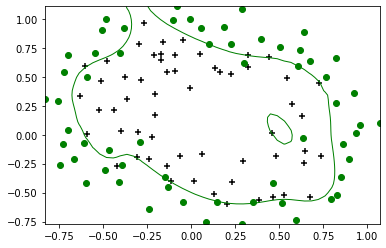

-----------------------------------------------------
Lambda:  0.1


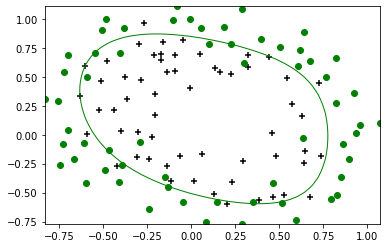

-----------------------------------------------------
Lambda:  1.0


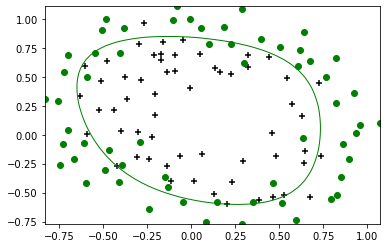

-----------------------------------------------------
Lambda:  10.0


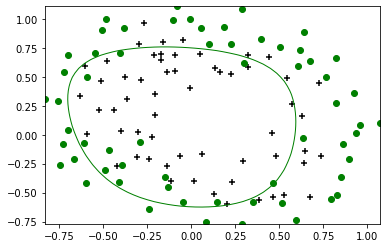

-----------------------------------------------------
Lambda:  100.0


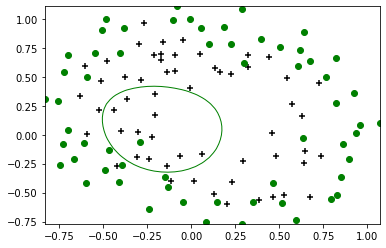

-----------------------------------------------------


In [14]:
lambdas = np.array([0.0000001, 0.1, 1, 10, 100])
regresion_logistica_regularizada("ex2data2.csv",lambdas)